**INFORMAÇÕES**



> **Notebook referente a primeira questão da segunda prova da disciplina Introdução a Inteligência Artifical (UFPB/2020.1), ministrada pela professora Dra. Thaís Gaudencio do Rêgo.**

**Discente**: Thomás Augusto Gouveia Chaves

**Matrícula**: 20180002671

*Enunciado: Acessar a base de dados HCV e desenvolver dois algoritmos supervisionados, podendo ser Redes Neurais Artificiais, Árvore de Decisão ou outros de sua escolha, para classificação entre Doador ou Não Doador, que são positivos para Hepatite C, Fibrose ou Cirrose. Ambos modelos devem ser analisados pelas métricas: Acurácia, Especificidade, Sensibilidade e Matriz de Confusão e os resultados devem ser discutidos. Na base consta instâncias rotuladas como Possíveis Doadores (0s=suspect Blood Donor), que devem ser classificadas separadamente após a construção dos modelos, compare os resultados obtidos em cada método utilizado.*

**BIBLIOTECAS UTILIZADAS**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# **RANDOM STATE**

Altere para variar os resultados dos métodos.

In [ ]:
random_state = 5

**CARREGAMENTO BASE DE DADOS**

In [ ]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv"

In [ ]:
dataset = pd.read_csv(data_url)
dataset.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


**PRÉ PROCESSAMENTO DA BASE DE DADOS**

Como é possível ver no cabeçalho da base, há um atributo 'Unnamed: 0' que não apresenta informação relevante para o método, que deve ser removido.

Além disso, o atributo 'Sex' apresenta valores do tipo string. Como os valores são binários (m ou f), é possível aplicar uma transformação destes valores com a função astype(int), que transforma m para 0 e f para 1.

Nesta etapa do pré processamento, também foram removidas amostras com dados faltosos e duplicados.

In [ ]:
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset['Sex'] = (dataset['Sex'] == 'f').astype(int)
dataset = dataset.dropna()
dataset = dataset.drop_duplicates()

**SEPARAÇÃO DAS AMOSTRAS PARA CLASSIFICAÇÃO**

Na base de dados, estão presentes amostras categorizadas como '0s=suspect Blood Donor', que serão reclassificadas após a construção do agente inteligente. Essas amostras são separadas da base de dados de treinamento e testes e a coluna de categoria é removida, tendo em vista que estes elas serão reclassificadas após a construção do modelo. 

In [ ]:
forClassifier = dataset.loc[dataset['Category'] == '0s=suspect Blood Donor']
forClassifier = forClassifier.drop('Category', axis=1)

fcN = forClassifier.values
robustscaler = preprocessing.StandardScaler()
fcN_scaled = robustscaler.fit_transform(fcN)
forClassifierN = pd.DataFrame(fcN_scaled)

**PRÉ PROCESSAMENTO DA BASE DE DADOS**

Nesta etapa, é feita a separação da base de dados de treinamento e testes das amostras que serão reclassificadas após a construção do modelo.

O objetivo deste modelo de agente inteligente é classificar doadores e não doadores de sangue. Inicialmente tinhamos 4 classes, 0=Blood Donor','1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'. As 3 últimas classes foram generalizadas como não doador. No fim, ficamos com o valor 0 para doador e 1 para não doador.

In [ ]:
dataset = dataset[dataset['Category'] != '0s=suspect Blood Donor']
dataset['Category'] = dataset['Category'].map({'0=Blood Donor': 0,'1=Hepatitis': 1, '2=Fibrosis': 1, "3=Cirrhosis": 1})

**ANÁLISE DAS CLASSES DA BASE DE DADOS**

Como é possível observar no gráfico abaixo, as classes 0 (doador) e 1 (não doador), do conjunto de treinamento, estão extremamente desbalanceadas, o que pode levar com que o modelo apresente previsões tendenciosas e equivocadas. Portanto, é preciso aplicar alguma técnica de balanceamento sobre a base de dados.

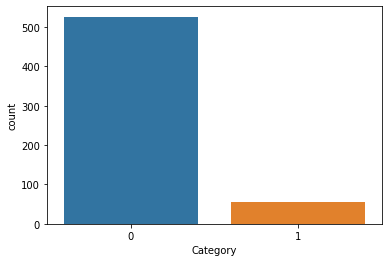

In [ ]:
plot = sns.countplot(x='Category', data=dataset)

**BALANCEAMENTO DA BASE DE DADOS (UNDERSAMPLING)**

Para fazer o balanceamento da base de dados, a ténica escolhida foi a undersampling, que consiste em reduzir a quantidade de amostras da classe que possui mais amostras. Neste caso, a redução foi feita na classe 0 (doador).

A redução das amostras da classe 0 foi feita de modo que o balanceamento com a classe 1 fosse total. Então, foram removidas, da base de dados, número_de_amostras_da_classe_0 - número_de_amostras_da_classe 1 amostras da classe 0, de forma aleatória. Deste modo, as duas classes ficaram totalmente balanceadas.

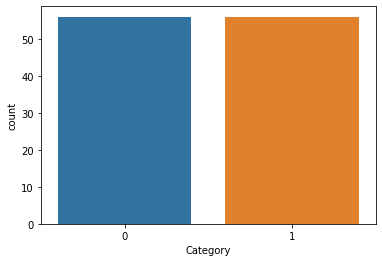

In [ ]:
over = dataset[dataset['Category'] == 0].sample(n=len(dataset[dataset['Category'] == 0])-len(dataset[dataset['Category'] == 1]), random_state=random_state)
dataset = dataset.drop(over.index, axis=0)

plot = sns.countplot(x='Category', data=dataset)

In [ ]:
X = dataset.drop('Category', axis=1)
y = dataset['Category']

**ANÁLISE SOBRE A MÉDIA E A MEDIANA DOS ATRIBUTOS**

Observando a média e a mediana dos atributos, é possível notar que, em algum deles, há uma variação considerável entre elas, o que indica a presença de outliers na base de dados. Por isso, é importante aplicar uma normalização que atenue estes outliers. 


In [ ]:
print('Mean:\n', X.mean())
print('\nMedian:\n', X.median())

Mean:
 Age     47.580357
Sex      0.321429
ALB     39.999107
ALP     64.395536
ALT     21.115179
AST     63.194643
BIL     21.617857
CHE      7.416071
CHOL     5.024911
CREA    94.116964
GGT     70.410714
PROT    71.158036
dtype: float64

Median:
 Age     46.500
Sex      0.000
ALB     41.000
ALP     54.900
ALT     18.000
AST     35.700
BIL     10.000
CHE      7.535
CHOL     4.910
CREA    75.150
GGT     35.900
PROT    71.150
dtype: float64


**NORMALIZAÇÃO DA BASE DE DADOS**

A normalização permite a atenuação dos outliers.

A normalização constrói um novo pandas.DataFrame, normalizado com o método StandardScaler, a partir dos valores de entrada da base de dados.

In [ ]:
x = X.values
robustscaler = preprocessing.StandardScaler()
x_scaled = robustscaler.fit_transform(x)
X_normalized = pd.DataFrame(x_scaled)

**DIVISÃO DA BASE DE DADOS PARA TREINAMENTO E TESTES**

Divisão da base de dados em 80% para treinamento e 20% para testes.

In [ ]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X_normalized, y, test_size=0.20, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)


**ANÁLISE DA CORRELAÇÃO ENTRE OS ATRIBUTOS DA BASE DE DADOS**

Observando o gráfico abaixo, é possível notar que a correlação entre os atributos da base de dados não é alta o suficiente para desconsiderarmos algum deles na construção do modelo. Portanto, todos os atributos devem ser mantidos no treinamento do agente.

In [ ]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,0.127240,-0.352698,0.190054,-0.235804,0.122274,0.150065,-0.338755,-0.153182,-0.010994,0.199199,-0.139654
Sex,0.127240,1.000000,-0.135029,0.116436,-0.155964,-0.135374,-0.077906,-0.101350,0.074952,-0.074924,-0.071181,0.108524
ALB,-0.352698,-0.135029,1.000000,-0.258407,0.343447,-0.211501,-0.411203,0.661454,0.300800,-0.106190,-0.116798,0.489460
ALP,0.190054,0.116436,-0.258407,1.000000,-0.079200,0.059317,0.130538,-0.142965,0.123440,0.232433,0.596679,-0.116595
ALT,-0.235804,-0.155964,0.343447,-0.079200,1.000000,0.091525,-0.282968,0.319396,0.249046,-0.160309,-0.094190,0.146987
AST,0.122274,-0.135374,-0.211501,0.059317,0.091525,1.000000,0.232686,-0.339881,-0.343648,-0.090137,0.415994,0.166189
BIL,0.150065,-0.077906,-0.411203,0.130538,-0.282968,0.232686,1.000000,-0.523379,-0.239853,-0.035993,0.178272,-0.147246
CHE,-0.338755,-0.101350,0.661454,-0.142965,0.319396,-0.339881,-0.523379,1.000000,0.548528,-0.054911,-0.143679,0.265303
CHOL,-0.153182,0.074952,0.300800,0.123440,0.249046,-0.343648,-0.239853,0.548528,1.000000,-0.090072,0.029196,0.181805
CREA,-0.010994,-0.074924,-0.106190,0.232433,-0.160309,-0.090137,-0.035993,-0.054911,-0.090072,1.000000,0.086596,-0.162577


**FUNÇÕES AUXILIARES**

Funções auxiliares responsáveis pelo encapsulamento do código.

**função buildClassifier:**

@param metric Métrica de classificador("gnb", "knn", "mlp", "dtr")

@param normalize Valor 0 para construir o classificador com a base não normalizada ou 1 para com a base normalizada.

@param printStatistics Valor 0 para não imprimir as estatísticas do classificador e 1 para imprimir.

@param value Valor opcional para uso de métodos que possuem um parâmetro para o seu funcionamento, como o K-Nearest Neighbirs(k) e o Multiplayer Perceptron (iterações).

@return Retorna o classificador construído com através do aprendizado de máquina sobre a base de dados.


In [ ]:
def printResults(classifier, y_test, normalize=0):
  if normalize == 1:
    y_pred = classifier.predict(X_testN)
    confusion = confusion_matrix(y_testN, y_pred)
  else:
    y_pred = classifier.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)

  total=sum(sum(confusion))

  accuracy = (confusion[0,0]+confusion[1,1])/total
  sensitivity = confusion[0,0]/(confusion[0,0]+confusion[0,1])
  specificity = confusion[1,1]/(confusion[1,0]+confusion[1,1])

  print('Accuracy:', accuracy)
  print('Sensitivity:', sensitivity )
  print('Specificity:', specificity)
  print('Confusion Matrix:\n', confusion)

In [ ]:
def buildClassifier(metric, normalize=0, printStatistics=0, value=5):
  if metric == "dtr":
    classifier = DecisionTreeClassifier()
    if normalize == 1:
      classifier.fit(X_trainN, y_trainN)
    else:
      classifier.fit(X_train, y_train)
  elif metric == "knn":
    classifier = KNeighborsClassifier(n_neighbors=int(value))
    if normalize == 1:
      classifier.fit(X_trainN, y_trainN)
    else:
      classifier.fit(X_train, y_train)
  elif metric == "gnb":
    classifier = GaussianNB()
    if normalize == 1:
      classifier.fit(X_trainN, y_trainN)
    else:
      classifier.fit(X_train, y_train)
  elif metric == "mlp":
    classifier = MLPClassifier(random_state=random_state, max_iter=int(value))
    if normalize == 1:
      classifier.fit(X_trainN, y_trainN)
    else:
      classifier.fit(X_train, y_train)  
  else:
    raise Exception("Unidentified classifier. Possible values: ""decision"", ""knn"", ""gnb"", ""mlp""")

  if printStatistics == 1:
    if normalize == 1:
      printResults(classifier, y_testN, normalize)
    else:
      printResults(classifier, y_test, normalize)
  return classifier

**VALIDAÇÃO DO MÉTODO E CLASSIFICAÇÃO DAS AMOSTRAS RESERVADAS ANTERIORMENTE**

**Classificadores implementados:**

Gaussian Naive Bayes: "gnb"

Multiplayer Perceptron: "mlp"

K-Nearest Neighbors: "knn"

Decision Tree: "dtr"


**Classificação**: Predictions.

In [ ]:
print("\nMultiplayer Perceptron with Normalized Data")
classifier = buildClassifier("mlp", 1, 1, 50)
print("Predictions:", classifier.predict(forClassifierN))

print("\nMultiplayer Perceptron with Non-Normalized Data")
classifier = buildClassifier("mlp", 0, 1, 50)
print("Predictions:", classifier.predict(forClassifier))

print("\nGaussian Naive Bayes with Normalized Data")
classifier = buildClassifier("gnb", 1, 1)
print("Predictions:", classifier.predict(forClassifierN))

print("\nGaussian Naive Bayes with Non-Normalized Data")
classifier = buildClassifier("gnb", 0, 1)
print("Predictions:", classifier.predict(forClassifier))

print("\nDecision Tree with Normalized Data")
classifier = buildClassifier("dtr", 1, 1)
print("Predictions:", classifier.predict(forClassifierN))

print("\nDecision Tree with Non-Normalized Data")
classifier = buildClassifier("dtr", 0, 1)
print("Predictions:", classifier.predict(forClassifier))

print("\nK-Nearest Neighbors with Normalized Data")
classifier = buildClassifier("knn", 1, 1, 10)
print("Predictions:", classifier.predict(forClassifierN))

print("\nK-Nearest Neighbors Non-Normalized Data")
classifier = buildClassifier("knn", 0, 1, 10)
print("Predictions:", classifier.predict(forClassifier))


Multiplayer Perceptron with Normalized Data
Accuracy: 0.8260869565217391
Sensitivity: 0.9166666666666666
Specificity: 0.7272727272727273
Confusion Matrix:
 [[11  1]
 [ 3  8]]
Predictions: [1 0 0 0 1 1 1]

Multiplayer Perceptron with Non-Normalized Data
Accuracy: 0.9130434782608695
Sensitivity: 0.9166666666666666
Specificity: 0.9090909090909091
Confusion Matrix:
 [[11  1]
 [ 1 10]]
Predictions: [1 0 1 0 1 1 0]

Gaussian Naive Bayes with Normalized Data
Accuracy: 0.8260869565217391
Sensitivity: 0.9166666666666666
Specificity: 0.7272727272727273
Confusion Matrix:
 [[11  1]
 [ 3  8]]
Predictions: [1 1 1 1 1 1 1]

Gaussian Naive Bayes with Non-Normalized Data
Accuracy: 0.8260869565217391
Sensitivity: 0.9166666666666666
Specificity: 0.7272727272727273
Confusion Matrix:
 [[11  1]
 [ 3  8]]
Predictions: [1 1 1 1 1 1 1]

Decision Tree with Normalized Data
Accuracy: 0.9565217391304348
Sensitivity: 0.9166666666666666
Specificity: 1.0
Confusion Matrix:
 [[11  1]
 [ 0 11]]
Predictions: [0 0 1 0 0 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## **Conclusões**

**Resultados**

Os resultados da classificação obtidos com os classificadores construídos, com excessão do Naive Bayes Gaussiano, seja com a base normalizada e não normalizada, apresentaram uma variação considerável a cada execução, o que mostrou uma certa instabilidade.

Por outro lado, os resultados obtidos com o método Naive Bayes são sempre concordantes com a classificação de não-doador para todas as instâncias, tanto para base normalizada quanto para a base não normalizada.

Em todos os testes realizados as estatísticas foram ótimas. Mesmo com um número reduzido de amostras, os métodos apresentaram acurácia maior que 80% de acertos, chegando até 100%, assim como a especificidade e sensibilidade. Portanto, não foi necessária a implementação de um método de validação cruzada, sendo o undersampling suficiente para um ótimo resultado.

**Normalização e não normalização**

Com método Multiplayer Perceptron, notei, em algumas execuções, que o classificador construindo com a base de dados normalizada tende a apresentar de mais classificações de instâncias com a classe 0.

Nos métodos Árvore de Decisão e K-Nearest Neighbors ficou evidente que a base de dados normalizada tende a apresentar mais classificações da classe doador (0), enquanto para classe não normalizada ocorrem mais classificações não doador.

### **Considerações finais**

A separação das instâncias categorizadas como '0s=suspect Blood Donor' aumentou consideravelmente a complexidade do pré-processamento, especialmente na normalização da base de dados. Uma alternativa que encontrei para esta dificuldade foi aplicar a normalização sobre as instâncias separadas para classificação posterior de um modo também separado. Tentei de várias formas de normalizar a base de dados como um todo. Mas, ocorreu um problema de tipo, pois estava gerando valores (< float dtype64) muito pequenos os quais o método de aprendizagem Multiplayer Perceptron não funcionava. Então, fiz dessa maneira. Espero que considere desta forma, pois eu sei que preciso normalizar a base como um todo, mas a separação de instâncias trouxe uma complexidade a mais.